# Lecture 6a - Hypothesis Testing

some personal notes:
- this is a formal way of determining whether a finding is statistically significant or not, instead of just eyeballing it
- there are cons of just eyeballing 'significant' findings

## Example - Clinical Trials for Pharmaceuticals

A neurologist is testing the effect of a drug on response time by injecting 100 rats with a unit dose of the drug, subjecting each to neurological stimulus, and recording its response time.

The neurologist knows that the mean response time for rats not injected with the drug is 1.2 seconds.

The sample mean of the 100 injected rats' response time is 1.05 seconds with a sample standard deviation of 0.5 seconds.

Does the drug have an effect on response time?

### The Null and Alternative Hypotheses

Let's define our hypotheses. 

First, we will define the <b><i>null hypothesis</b></i> to refer to the status quo, i.e. that the drug has no effect.

Second, we will define the <b><i>alternative hypothesis</b></i> to usually refers to the event in opposition to the status quo, i.e. that the drug has an effect.

Formally, we represent these hypotheses as

\begin{align*}
    H_0 &: \mu = 1.2\\ 
    H_1 &: \mu \neq 1.2
\end{align*}

### The Hypothesis Testing Procedure

1) Assume that the null hypothesis $H_0$ is true.


2) Calculate the sampling distribution of $\mu$.


3) Calculate the probability that we would observe samples as extreme as our data.


4) Reject the null hypothesis $H_0$ if the probability is "small enough" (less than the significance level $\alpha$).


5) If the probability does not meet our defined threshold, we fail to reject the null hypothesis.

---

<i>Note: If it helps you internalize it better, you can just pretend that we "accept" the null hypothesis $H_0$.</i>

---

### The p-value and Significance

In the procedure outlined above, the probability of observing the data given that $H_0$ is true is called the <b><i>p-value</b></i>.

In addition, the threshold probability for "small enough" is called the <b><i>significance level</i> $\alpha$.

---

<i>Side Note: We haven't really said anything about the true data generating process. So $\mu$ just refers to the first moment of whatever that process is. It does not necessarily have a Normal distribution. In fact, it could be some extremely complicated distribution that cannot be expressed analytically.</i>

---

### Back to the Clinical Trial Problem...

Let's assume that $H_0$ is true, i.e. that $\mu = 1.2$. Then our observed data $\bar{x}$, has the following sampling distribution,

\begin{align*}
    \bar{x} \sim N\left(1.2, \frac{\sigma^2}{100}\right)
\end{align*}

Since we don't know the true $\sigma$, let's <i><u>approximate</i></u> this sampling distribution by replacing $\sigma$ with our sample standard deviation $s$,

\begin{align*}
    \bar{x} \sim N\left(1.2, \frac{0.5^2}{100}\right)
\end{align*}

Moving on to Step 2 of the hypothesis testing procedure, let's calculate the probability of observing samples that are as extreme as our data.

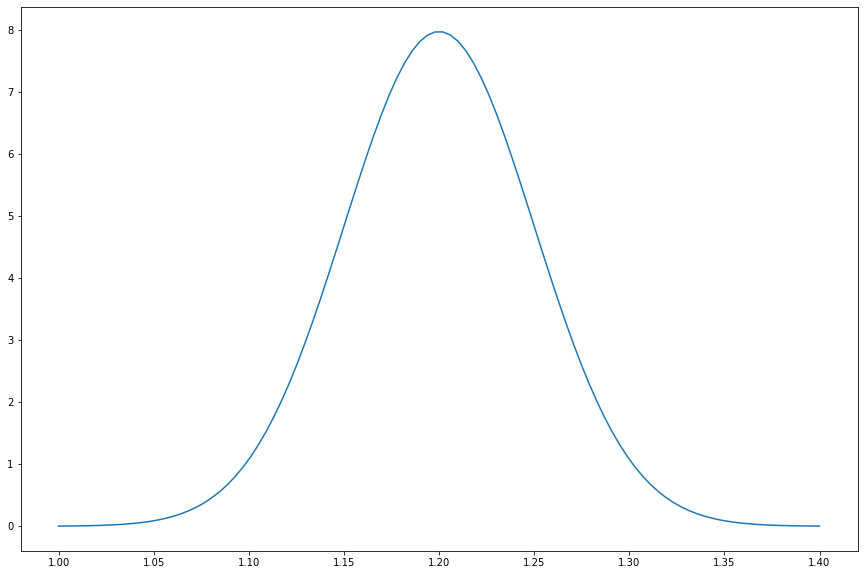

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

plt.rcParams['figure.figsize'] = [15, 10]

x_bar = 1.05
s = 0.5
n = 100

mu = 1.2
sigma = s/np.sqrt(n) # approx

x = np.linspace(1.0, 1.4, 100) #for plotting nicely
plt.plot(x, norm.pdf(x, loc = mu, scale = sigma))
plt.show()

Formally, we are interested in calculating the following probability,

\begin{align*}
    P\left(\bar{x} \leq 1.05 \ \ \text{OR} \ \ \bar{x} \geq 1.35 \right)
\end{align*}

Since the sampling distribution is symmetric, we can rewrite the above quantity as,

\begin{align*}
    2 \times P\left(\bar{x} \leq 1.05 \right) &= 2 \times P\left(\frac{\bar{x} - 1.2}{.05} \leq \frac{1.05 - 1.2}{.05}\right)\\
    &= 2 \times P\left(Z \leq -3\right)\\
    &= 2 \times \Phi(-3)
\end{align*}

In [2]:
z_score = (x_bar - mu)/sigma
print('z-score:', z_score)
print('p-value:', 2*norm.cdf(z_score))

z-score: -2.9999999999999982
p-value: 0.0026997960632602026


### To Reject or Not Reject?

With a significance level of $\alpha = 0.05$, we see that our p-value is smaller compared to this threshold.

Thus, here are some statements we can make:

1) If the null hypothesis were true, the probability that we could have gotten this result is about 0.003.

2) Our p-value is statistically significant.

3) We should reject the null hypothesis $H_0$ that the drug has no effect.

4) There is strong evidence for the alternative hypothesis $H_1$ that the drug has an effect. We accept $H_1$.

---

### One-Tailed vs Two-Tailed Tests

What if we wanted to know whether the drug lowered the response time or raised it?

In the previous section, we concluded that the drug had some effect on the response time. The test we conducted was called a <b><i>two-tailed test</b></i>.

To check if the drug <u>lowered</u> the response time, we can reconstruct our hypotheses.

First, we will again define $H_0$ to be that the drug has no effect.

Second, we will define a new alternative $H_1$ to be that the drug lowers the response time.

\begin{align*}
    H_0 &: \mu ≥ 1.2\\ 
    H_1 &: \mu < 1.2
\end{align*}

This type of test is called a <b><i>one-tailed test</b></i>.

This time, we should calculate the probability that we obtain a result lower than $1.05$ given that $H_0$ is true.

\begin{align*}
    P\left(\bar{x} \leq 1.05\right) &= \Phi(3)
\end{align*}

In [3]:
z_score = (x_bar - mu)/sigma
print('z-score:', z_score)
print('p-value:', norm.cdf(z_score))

z-score: -2.9999999999999982
p-value: 0.0013498980316301013


Thus, we make similar inferences to those described above.

---

## Z-statistics vs T-statistics

Notice that since we did not know the true standard deviation $\sigma$, we had to use the sample standard deviation $s$ as a proxy.

If the sample size of our data is greater than 30, i.e. $n > 30$, then the z-score transformation (using $s$) of our sample mean

\begin{align*}
Z &= \frac{\bar{x} - \mu}{s/n}
\end{align*}

is approximately normal. 

However, if $n < 30$ then $Z$ is NOT approximately normal. In fact, it has a t-distribution (so use this instead).

---

## Type I/II Errors and Power

Given our set of null and alternative hypotheses, what are the consequences of rejecting (or failing to reject) the null hypothesis? 

**Type I Error :** Error when we reject a true $H_0$. (False Positive)

**Type II Error :** Error when we fail to reject a false $H_0$. (False Negative)

The following table summarizes the possible combinations:
  
| Test Result |  $H_0$ True | $H_0$ False |  
| --- | --- | --- |  
| Reject $H_0$ | Type I Error  | Correct |  
| Fail to reject $H_0$ | Correct | Type II Error |  

Note that some errors can be more costly than others. 

For example, mistakenly classifying a malignant tumor as benign can have much more dire consequences than  classifying a benign tumor as malignant.

### Probability of a Type I Error

What is the probability of a Type I error?

We can rephrase the question as: What is the probability that I reject $H_0$, given that $H_0$ is true?

It is actually equal to your significance level $\alpha$!

### Probability of a Type II Error

What is the probability of a Type II error?

We can rephrase the question as: What is the probability that I fail to reject $H_0$, given that $H_0$ is false?

As it turns out, this probability is difficult to compute directly. 

Let us refer to this probability be $\beta$.

### Power

Continuing from above, we define the <b><i>power</b></i> of a test as $1 - \beta$.

In other words, power is the probability that we reject $H_0$ given that $H_0$ is false.

Another way of thinking about power is that it is the probability that we DON'T commit a Type II error.

### How to Increase Power?

Here's a summary of the ways in which the power of our significance tests can increase:

1) Increase $\alpha$.

2) Increase sample size $n$.

3) Low variability, i.e. lower $\sigma$.

4) True parameter is far from $H_0$.

Obviously, some of these facts are beyond our control.